In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

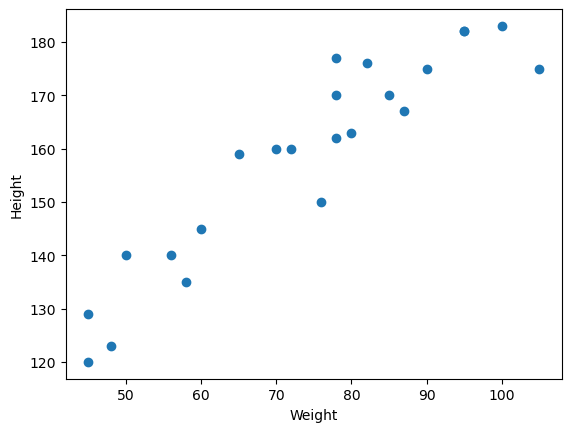

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [6]:
## Train test split
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
X.shape

(23, 1)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [13]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

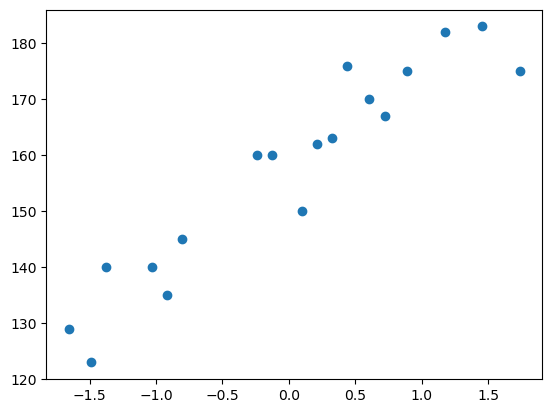

In [14]:
plt.scatter(X_train,y_train)

In [15]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [16]:
regressor=LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [18]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


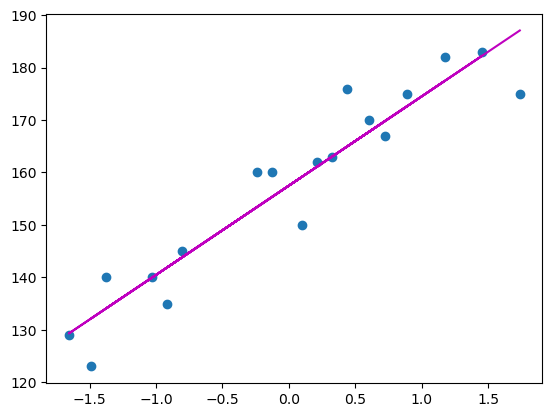

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'m')

1.prediction of train data
predicted height output= intercept +coef_(Weights)
y_pred_train =157.5 + 17.03(X_train)


2.prediction of test data
predicted height output= intercept +coef_(Weights)
y_pred_test =157.5 + 17.03(X_test)

In [20]:
y_pred_test=regressor.predict(X_test)

In [21]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

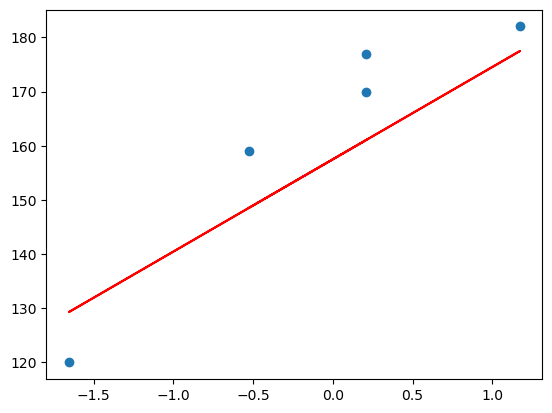

In [22]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

Performance Metrics
MSE,MAE,RMSE
R square and adjusted R square

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


R square

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [26]:
score

0.7769869860423441

Adjusted R Square

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [27]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [28]:
regressor

LinearRegression()

In [29]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [30]:
scaled_weight[0]

array([0.32350772])

In [31]:
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


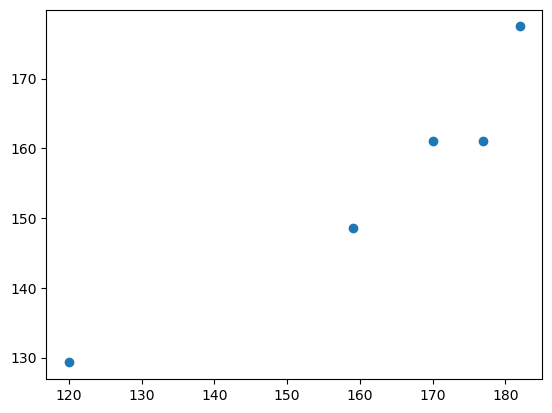

In [32]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [33]:
## Residuals
residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_10260\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

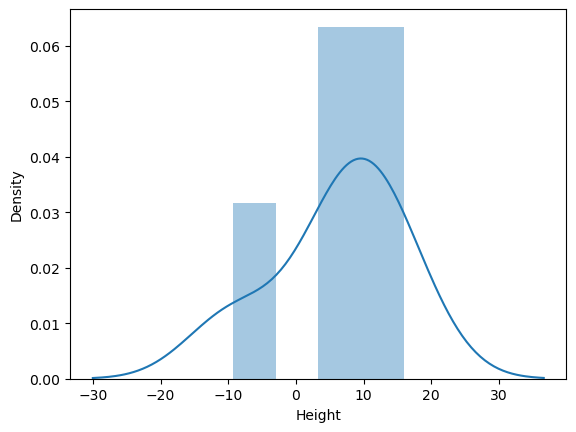

In [36]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

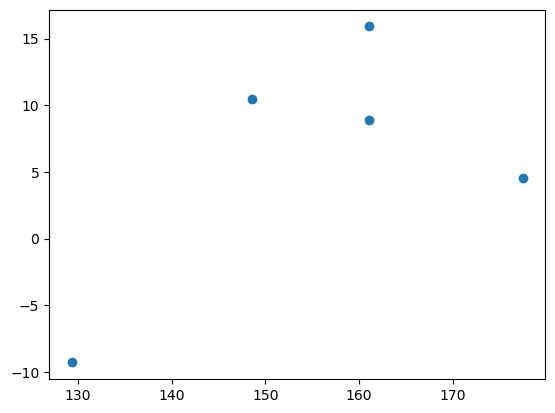

In [37]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)